<h2 style="text-align: center;">PAT-1</h2>
<h3 style="text-align: center;">Machine Learning for Robotics</h3>
<h3 style="text-align: center;">Faculty: Dr. N.M. Elango </h3>
<h3 style="text-align: right;">Date: 24/09/2024</h3>

<center><img src="PAT-Q.png" alt="Image 1" style="width: 60%;"/></center>

# Step 1: Load the dataset


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score ,f1_score , roc_curve , auc
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

data = {
    'Dark_cloud': ['y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'n'],
    'Wind': ['normal', 'normal', 'speedy', 'speedy', 'speedy', 'normal', 'normal', 'speedy', 'speedy'],
    'Humidity': ['High', 'Normal', 'Normal', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal'],
    'Rain': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

# Step 2: Preprocess the data (Encoding each column separately)


In [2]:
le_dark_cloud = LabelEncoder()
le_wind = LabelEncoder()
le_humidity = LabelEncoder()
le_rain = LabelEncoder()

df['Dark_cloud'] = le_dark_cloud.fit_transform(df['Dark_cloud'])
df['Wind'] = le_wind.fit_transform(df['Wind'])
df['Humidity'] = le_humidity.fit_transform(df['Humidity'])
df['Rain'] = le_rain.fit_transform(df['Rain'])


# Step 3: Split the data into features (X) and labels (y)


In [3]:
X = df.drop('Rain', axis=1)
y = df['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes classifier


In [4]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Step 5: Predict for the given instance {n, normal, high}


In [5]:
# Use the individual label encoders to encode the input features
instance = [[
    le_dark_cloud.transform(['n'])[0], 
    le_wind.transform(['normal'])[0], 
    le_humidity.transform(['High'])[0]
]]

prediction = model.predict(instance)
predicted_label = le_rain.inverse_transform(prediction)
print(f"Prediction for the instance {instance}: {predicted_label[0]}")


Prediction for the instance [[0, 0, 0]]: No


In [6]:
print(X_test)


   Dark_cloud  Wind  Humidity
7           0     1         1
1           0     0         1


In [7]:
print(y_test)

7    0
1    1
Name: Rain, dtype: int64


# Step 6: Validate the model using confusion matrix


[0 1]
Confusion Matrix:
Accuracy: 100.00%


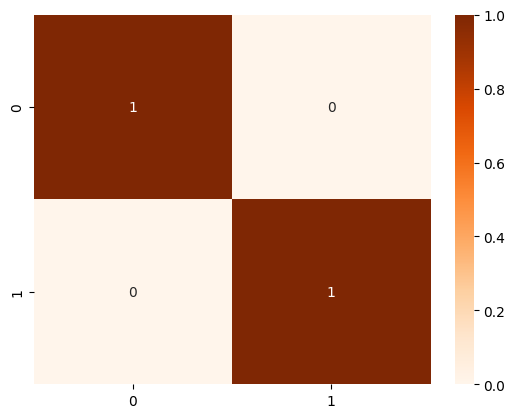

In [8]:
import seaborn as sns

y_pred = model.predict(X_test)
print(y_pred)
# Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
sns.heatmap(conf_matrix,annot=True,cmap='Oranges',fmt='d')
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 7: Calculate precision, recall, F1-score


In [9]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Precision: 1.00
Recall: 1.00
F1 Score: 1.00
